Finalizando a classe Valor
==========================



## Introdução



Chegou a hora de finalizar a classe `Valor`!



## Objetivo



O objetivo é fazer com que a classe `Valor` seja capaz de realizar algumas operações necessárias para que seja usada na nossa rede neural artificial.



## Importações



In [1]:
import math
from funcoes import plota_grafo

## Código e discussão



### Finalizando a classe `Valor`



Aqui está a classe `Valor` assim como feita na aula anterior. Vamos modificá-la para cumprir nossos objetivos (ver objetivos na próxima seção).



In [2]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo
        self.grad = 0

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_adicao():
            self.grad += saida.grad * 1
            outro_valor.grad += saida.grad * 1

        saida.propagar = propagar_adicao

        return saida
    
    def __radd__(self, outro_valor): # --> será chamado quando tivermos outro_valor + self
        return self + outro_valor

    def __mul__(self, outro_valor):
        if not isinstance(outro_valor, Valor):
            outro_valor = Valor(outro_valor)
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_multiplicacao():
            self.grad += saida.grad * outro_valor.data
            outro_valor.grad += saida.grad * self.data

        saida.propagar = propagar_multiplicacao

        return saida
    
    def __rmul__(self, outro_valor): # --> será chamado quando tivermos outro valor * self
        return self * outro_valor
    
    def __truediv__(self, outro_valor): # --> será chamado quando tivermos self / outro_valor
        return self * outro_valor ** (-1)
    
    def __pow__(self, expoente):
        
        assert isinstance(expoente, (int, float))
        
        data = self.data ** expoente
        progenitor = (self, )
        operador_mae = f"**{expoente}"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_exponenciacao():
            self.grad += saida.grad * expoente * (self.data ** (expoente - 1))

        saida.propagar = propagar_exponenciacao

        return saida
    
    def __neg__(self):
        return self * (-1)
    
    def __sub__(self, outro_valor):
        return self + (-outro_valor)
    
    def __rsub__(self, outro_valor):
        return self * (-1) + outro_valor
    
    def exp(self):
        data = math.exp(self.data)
        progenitor = (self, )
        operador_mae = "exp"
        saida = Valor(data, progenitor, operador_mae)

        def propagar_exp():
            self.grad += saida.grad * data

        saida.propagar = propagar_exp

        return saida
    
    def sig(self):
        return self.exp() / (self.exp() + 1)
    
    def propagar(self):
        pass

    def propagar_tudo(self):
        ordem_topologica = []
        visitados = set()

        def constroi_ordem_topologica(v):
            if v not in visitados:
                visitados.add(v)
                for progenitor in v.progenitor:
                    constroi_ordem_topologica(progenitor)
                ordem_topologica.append(v)

        constroi_ordem_topologica(self)

        self.grad = 1  # o gradiente do vértice folha deve ser 1

        for v in reversed(ordem_topologica):
            v.propagar()

### Objetivos a serem cumpridos



Quero poder acidionar uma instância de `Valor` com uma constante qualquer.



In [3]:
a = Valor(10, rotulo="a")
b = a + 1
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer.



In [4]:
a = Valor(10, rotulo="a")
b = a * 10
print(b)

Valor(data=100)


Quero poder acidionar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [5]:
a = Valor(10, rotulo="a")
b = 1 + a
print(b)

Valor(data=11)


Quero poder multiplicar uma instância de `Valor` com uma constante qualquer, mas na ordem oposta.



In [6]:
a = Valor(10, rotulo="a")
b = 10 * a
print(b)

Valor(data=100)


Quero poder aplicar a função exponencial ($e^x$) em uma instância de `Valor`, computando corretamente o gradiente local desta operação.



In [7]:
a = Valor(1, rotulo="a")
b = a.exp()
print(b)

Valor(data=2.718281828459045)


Quero poder elevar uma instância de `Valor` a um número real qualquer. **Nota**: não vai funcionar se fizer um `Valor` elevado a outro `Valor` pois vamos propagar os gradientes apenas considerando que estamos elevando a uma constante qualquer.



In [8]:
a = Valor(10, rotulo="a")
b = a**2
print(b)

Valor(data=100)


Quero poder dividir uma instância de `Valor` por outra instância de `Valor`.



In [9]:
a = Valor(1, rotulo="a")
b = Valor(2, rotulo="b")
c = a / b
print(c)

Valor(data=0.5)


Quero poder computar o negativo de uma instância de `Valor`.



In [10]:
a = Valor(1, rotulo="a")
b = -a
print(b)

Valor(data=-1)


Quero poder subtrair uma instância de `Valor` por outra instância de `Valor`.



In [11]:
a = Valor(10, rotulo="a")
b = Valor(3, rotulo="b")
c = a - b
print(c)

Valor(data=7)


E, finalmente, quero poder aplicar a função sigmoide (também conhecida como logística) a uma instância de `Valor`. A função sigmoide é a seguinte:

$$
S(x) = \frac{e^x}{e^x + 1}
$$



Valor(data=0.7310585786300048)


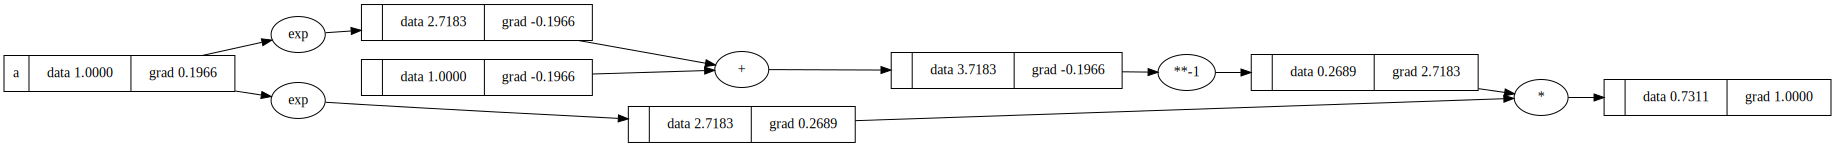

In [13]:
a = Valor(1, rotulo="a")
b = a.sig()
print(b)
b.propagar_tudo()
plota_grafo(b)


## Conclusão

Neste notebook, realizamos modificações na classe `Valor` para atender aos objetivos definidos. A classe foi atualizada para adicionar uma instância de `Valor` com uma constante qualquer, multiplicar uma instância de `Valor` por uma constante, adicionar uma instância de `Valor` com uma constante na ordem oposta, multiplicar uma instância de `Valor` por uma constante na ordem oposta, aplicar a função exponencial $e^x$ a uma instância de `Valor`, elevar uma instância de `Valor` a um número real qualquer, dividir uma instância de `Valor` por outra, computar o negativo de uma instância de `Valor` e subtrair uma instância de `Valor` por outra. Além disso, implementamos a <span style=color:red;font-size:150%>função sigmoide</span> $\sigma$ (ou logística) em uma instância de `Valor`.

Essas modificações na classe ampliaram muito sua funcionalidade, permitindo operações matemáticas mais complexas e adequadas ao processamento de Redes Neurais. Com essas adições, agora temos uma base sólida para realizar cálculos mais avançados em nossa rede neural e ainda computar corretamente o gradiente local de cada operação! A <span style=color:red;font-size:150%>função sigmoide</span> será futuramente utilizada como a **função de ativação** da nossa Rede!

As novas funcionalidades implementadas nos permitem construir redes neurais mais poderosas e eficientes; a capacidade de aplicar funções como exponenciais, sigmoide e realizar operações aritméticas fundamentais expande nossas possibilidades de modelagem e análise de dados.

Em resumo, as modificações realizadas na classe `Valor` neste notebook forneceram uma base sólida para o processamento e o cálculo do gradiente local em operações mais avançadas em redes neurais. Essas atualizações capacitam nossa rede neural a lidar com uma gama mais ampla de tarefas e a explorar recursos matemáticos essenciais para o aprendizado de máquina! :)

## Playground

